In [3]:
import skimage
print(skimage.__version__)
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.pylab as plt


0.14.1


622 350


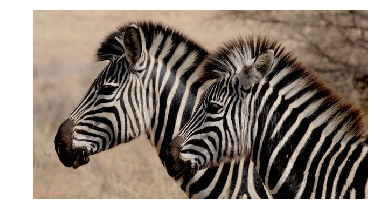

In [4]:
im = Image.open("../images/zebras.jpg")
print(im.width, im.height)

plt.figure(figsize=(6,6))
plt.imshow(im) # display the image
plt.axis('off')
plt.show()

# Negating an image

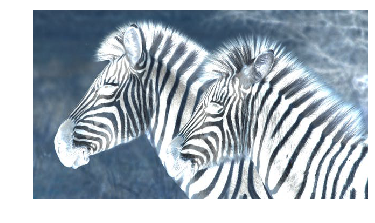

In [5]:
im = Image.open("../images/zebras.jpg")
im_t = im.point(lambda x: 255 - x)
plt.figure(figsize=(6,6))
plt.imshow(im_t) # display the image
plt.axis('off')
plt.show()
# im_t.show()

# crop the image

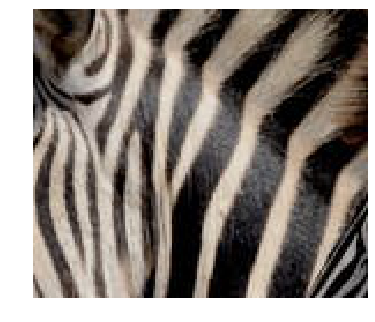

In [33]:
im_c = im.crop((175,75,320,200)) # crop the rectangle given by (left, top, right, bottom) from the image
plt.figure(figsize=(6,6))

plt.imshow(im_c) # display the image
plt.axis('off')
plt.show()


# Resizing an image

In [37]:
im_large = im.resize((im.width*5, im.height*5), Image.BILINEAR) # bi-linear interpolation

# plt.imshow(im_large) # display the image
# plt.axis('off')
# plt.show()
print(im_large.width, im_large.height)
im_large.show()


3110 1750


# convert the RGB color image to a grayscale image

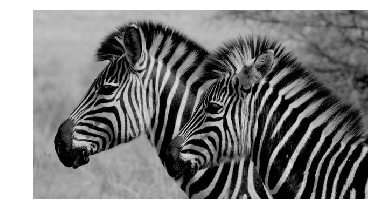

In [48]:
im_g = im.convert('L') # convert the RGB color image to a grayscale image
plt.figure(figsize=(6,6))

plt.imshow(im_g) # display the image
plt.axis('off')
plt.show()


# Log transformation

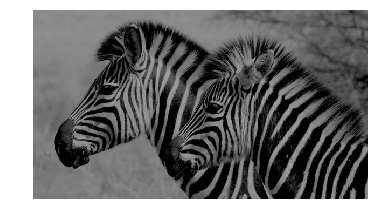

In [49]:
im_g = im_g.point(lambda x: 255*np.log(1+x/255))

plt.imshow(im_g) # display the image
plt.axis('off')
plt.show()

# power Log transformation

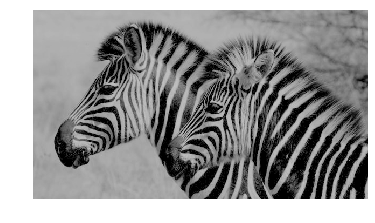

In [50]:
im_plog = im_g.point(lambda x: 255*(x/255)**0.6)

plt.imshow(im_plog) # display the image
plt.axis('off')
plt.show()


# Reflecting an image

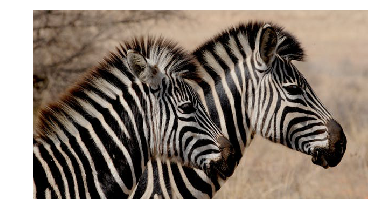

In [57]:
im_Reflect = im.transpose(Image.FLIP_LEFT_RIGHT)# reflect about the vertical axis

plt.imshow(im_Reflect) # display the image
plt.axis('off')
plt.show()


# rotating an image

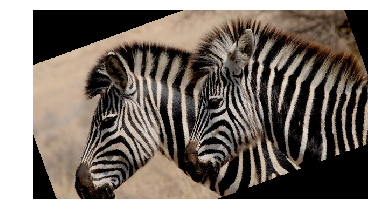

In [62]:
im_45 = im.rotate(20) # rotate the image by 20 degrees

plt.imshow(im_45) # display the image
plt.axis('off')
plt.show()


# Plotting the histograms of pixel values for the RGB channels of an imag

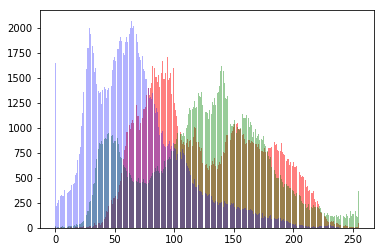

In [64]:
pl = im.histogram()
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.show()

# Separating the RGB channels of an image

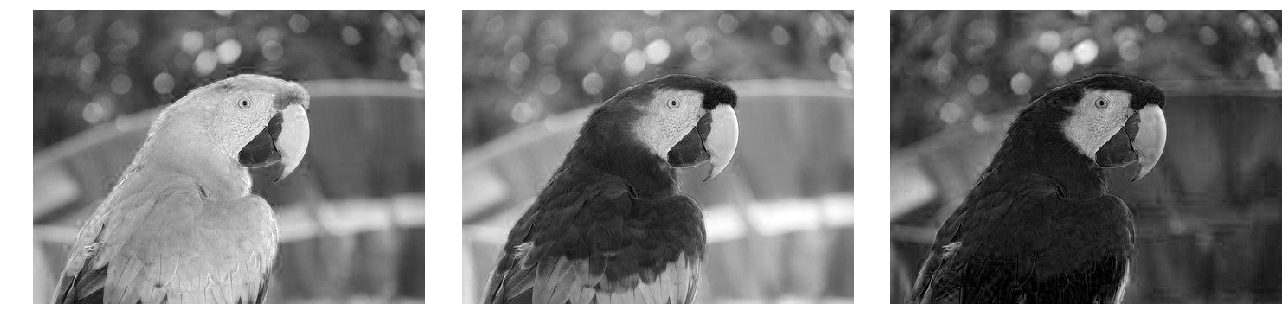

In [66]:
im = Image.open("../images/parrot.png")
ch_r, ch_g, ch_b = im.split() # split the RGB image into 3 channels: R, G and B
# we shall use matplotlib to display the channels
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channels

# Superimposing two images

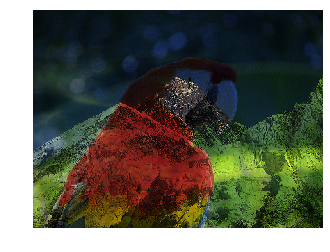

In [68]:
im1 = Image.open("../images/parrot.png")
im2 = Image.open("../images/hill.png").convert('RGB').resize((im1.width, im1.height))
imm = multiply(im1, im2)

plt.imshow(imm) # display the image
plt.axis('off')
plt.show()

# adding two images 

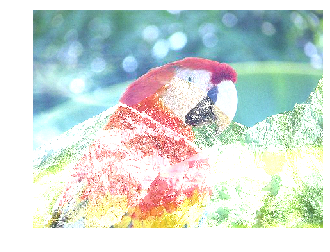

In [69]:
imadd = add(im1, im2)

plt.imshow(imadd) # display the image
plt.axis('off')
plt.show()

# Computing the difference between two images

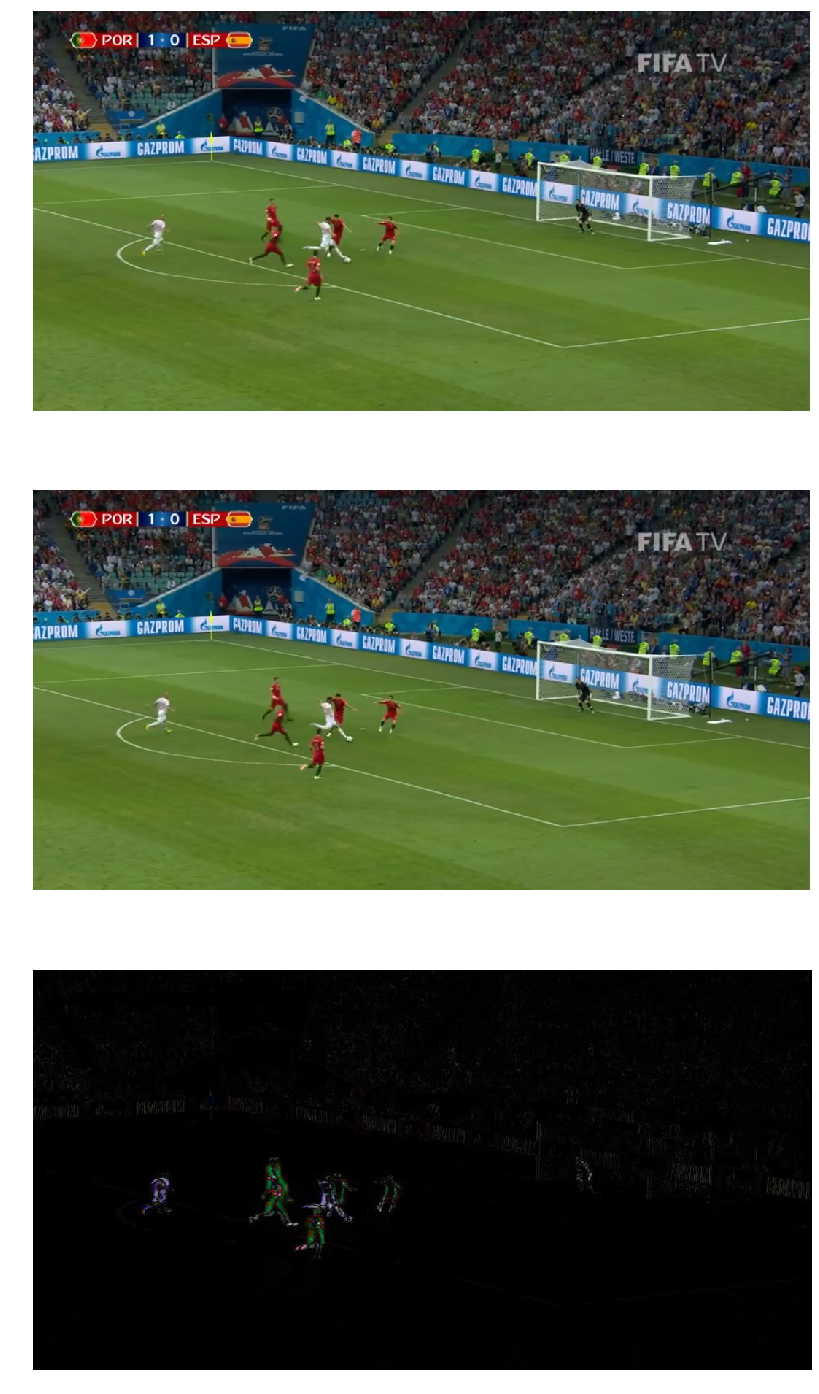

In [70]:
from PIL.ImageChops import subtract, multiply, screen, difference, add
im1 = Image.open("../images/goal1.png") # load two consecutive frame images from the video
im2 = Image.open("../images/goal2.png")
im = difference(im1, im2)
plt.figure(figsize=(20,25))
im.save("../images/goal_diff.png")
plt.subplot(311)
plt.imshow(im1)
plt.axis('off')
plt.subplot(312)
plt.imshow(im2)
plt.axis('off')
plt.subplot(313)
plt.imshow(im), plt.axis('off')
plt.show()

# Adding random Gaussian noise to images

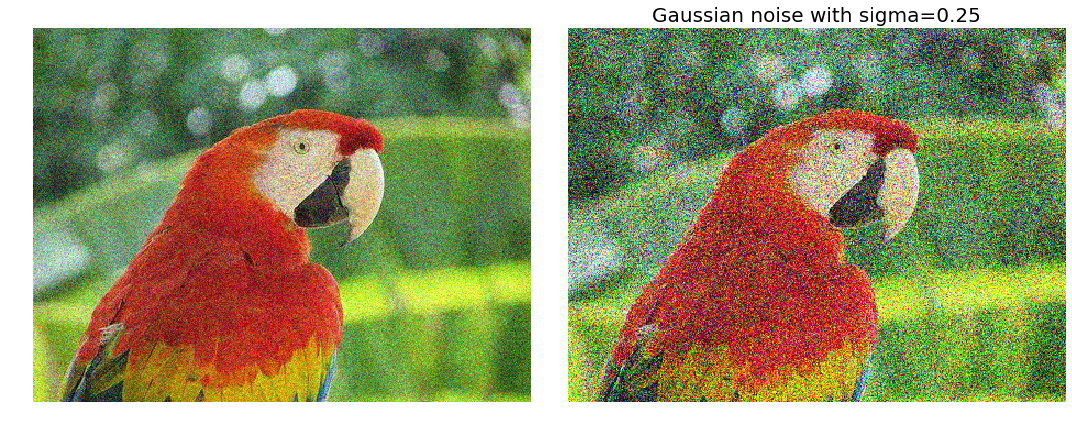

In [71]:
im = img_as_float(imread("../images/parrot.png"))
plt.figure(figsize=(15,12))
sigmas = [0.1, 0.25]
for i in range(2):
    noisy = random_noise(im, var=sigmas[i]**2)
    plt.subplot(1,2,i+1)
    plt.imshow(noisy)
    plt.axis('off')
plt.title('Gaussian noise with sigma=' + str(sigmas[i]), size=20)
plt.tight_layout()
plt.show()